In [1]:
import pandas as pd
import numpy as np
import shapely
from shapely.geometry import shape, mapping
import geopandas as gpd
from geopandas.tools import sjoin
import requests 
import json
import matplotlib.pyplot as plt

/Users/gil/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
print('Necessary libraries have been imported successfully.')

Necessary libraries have been imported successfully.


In [3]:
tracts2016 = pd.read_csv('plzwrk141619/2016alltractdata.csv')
tracts2019 = pd.read_csv('plzwrk141619/2019alltractdata.csv')

In [4]:
tracts2016.columns

Index(['id', 'Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population',
       'Estimate!!SEX AND AGE!!18 years and over',
       'Percent!!SEX AND AGE!!18 years and over', 'Latino Total Population',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican',
       'Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican',
       'Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!

In [5]:
proct16 = tracts2016[['Geographic Area Name','Estimate!!SEX AND AGE!!Total population','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino']]

In [6]:
 tracts2019.columns

Index(['id', 'Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population',
       'Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population',
       'Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican',
       'Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!

In [7]:
proct19 = tracts2019[['Geographic Area Name','Estimate!!SEX AND AGE!!Total population','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino']]

In [8]:
proct19.columns

Index(['Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino'],
      dtype='object')

In [9]:
proct16 = proct16.rename(columns = {'Geographic Area Name':'Tract','Estimate!!SEX AND AGE!!Total population':'Total Population 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)':'LatinX Population 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican':'Mexican 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican':'Puerto Rican 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban':'Cuban 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino':'Other LatinX 2016'})
proct19 = proct19.rename(columns = {'Geographic Area Name':'Tract','Estimate!!SEX AND AGE!!Total population':'Total Population 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)':'LatinX Population 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican':'Mexican 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican':'Puerto Rican 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban':'Cuban 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino':'Other LatinX 2019'})

In [10]:
proct16['Tract'] = proct16['Tract'].astype(str)
proct19['Tract'] = proct19['Tract'].astype(str)

In [11]:
proct16

,Tract,Total Population 2016,LatinX Population 2016,Mexican 2016,Puerto Rican 2016,Cuban 2016,Other LatinX 2016
0,101.0,2962,164,0,105,0,59
1,102.06,3168,10,1,1,0,8
2,102.08,1589,30,17,0,0,13
3,103.04,2107,23,7,0,6,10
4,103.06,2817,53,0,0,0,53
...,...,...,...,...,...,...,...
1473,7601.0,3386,0,0,0,0,0
1474,7611.0,5178,42,0,41,0,1
1475,7612.0,5541,397,101,95,0,201
1476,7613.0,3397,515,9,471,11,24


In [12]:
type(proct19)

pandas.core.frame.DataFrame

In [13]:
merged = pd.merge(proct16,proct19, how = "left", left_on = ['Tract'],right_on =['Tract'])

In [14]:
merged

,Tract,Total Population 2016,LatinX Population 2016,Mexican 2016,Puerto Rican 2016,Cuban 2016,Other LatinX 2016,Total Population 2019,LatinX Population 2019,Mexican 2019,Puerto Rican 2019,Cuban 2019,Other LatinX 2019
0,101.0,2962,164,0,105,0,59,2973,124,6,23,32,63
1,102.06,3168,10,1,1,0,8,3617,44,0,0,26,18
2,102.08,1589,30,17,0,0,13,1122,17,17,0,0,0
3,103.04,2107,23,7,0,6,10,2394,20,0,0,14,6
4,103.06,2817,53,0,0,0,53,2507,23,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,7601.0,3386,0,0,0,0,0,3441,1,0,0,0,1
1498,7611.0,5178,42,0,41,0,1,5213,62,0,0,0,62
1499,7612.0,5541,397,101,95,0,201,5506,483,154,20,0,309
1500,7613.0,3397,515,9,471,11,24,3259,341,0,161,50,130


In [15]:
permerged = merged.copy()

In [16]:
points = merged.copy()

In [17]:
points['% Change in LatinX Pop.'] = (points['LatinX Population 2019']/points['Total Population 2019'])-(points['LatinX Population 2016']/points['Total Population 2016'])

In [18]:
points['% Change in Total Pop.'] = (points['Total Population 2019']-points['Total Population 2016'])/points['Total Population 2016']

In [19]:
points['% Puerto Rican Change'] = (points['Puerto Rican 2019']/points['Total Population 2019'])-(points['Puerto Rican 2016']/points['Total Population 2016'])

In [20]:
points['% Mexican Change'] = (points['Mexican 2019']/points['Total Population 2019'])-(points['Mexican 2016']/points['Total Population 2016'])

In [21]:
points['% Cuban Change'] = (points['Cuban 2019']/points['Total Population 2019'])-(points['Cuban 2016']/points['Total Population 2016'])

In [22]:
points['% Other LatinX Change'] = (points['Other LatinX 2019']/points['Total Population 2019'])-(points['Other LatinX 2016']/points['Total Population 2016'])

In [23]:
points

,Tract,Total Population 2016,LatinX Population 2016,Mexican 2016,Puerto Rican 2016,Cuban 2016,Other LatinX 2016,Total Population 2019,LatinX Population 2019,Mexican 2019,Puerto Rican 2019,Cuban 2019,Other LatinX 2019,% Change in LatinX Pop.,% Change in Total Pop.,% Puerto Rican Change,% Mexican Change,% Cuban Change,% Other LatinX Change
0,101.0,2962,164,0,105,0,59,2973,124,6,23,32,63,-0.013659,0.003714,-0.027713,0.002018,0.010764,0.001272
1,102.06,3168,10,1,1,0,8,3617,44,0,0,26,18,0.009008,0.141730,-0.000316,-0.000316,0.007188,0.002451
2,102.08,1589,30,17,0,0,13,1122,17,17,0,0,0,-0.003728,-0.293896,0.000000,0.004453,0.000000,-0.008181
3,103.04,2107,23,7,0,6,10,2394,20,0,0,14,6,-0.002562,0.136213,0.000000,-0.003322,0.003000,-0.002240
4,103.06,2817,53,0,0,0,53,2507,23,0,0,0,23,-0.009640,-0.110046,0.000000,0.000000,0.000000,-0.009640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,7601.0,3386,0,0,0,0,0,3441,1,0,0,0,1,0.000291,0.016243,0.000000,0.000000,0.000000,0.000291
1498,7611.0,5178,42,0,41,0,1,5213,62,0,0,0,62,0.003782,0.006759,-0.007918,0.000000,0.000000,0.011700
1499,7612.0,5541,397,101,95,0,201,5506,483,154,20,0,309,0.016075,-0.006317,-0.013513,0.009742,0.000000,0.019846
1500,7613.0,3397,515,9,471,11,24,3259,341,0,161,50,130,-0.046971,-0.040624,-0.089250,-0.002649,0.012104,0.032824


In [24]:
points = points[['Tract','% Change in LatinX Pop.','% Change in Total Pop.','% Puerto Rican Change','% Mexican Change','% Cuban Change','% Other LatinX Change']]

In [25]:
points

,Tract,% Change in LatinX Pop.,% Change in Total Pop.,% Puerto Rican Change,% Mexican Change,% Cuban Change,% Other LatinX Change
0,101.0,-0.013659,0.003714,-0.027713,0.002018,0.010764,0.001272
1,102.06,0.009008,0.141730,-0.000316,-0.000316,0.007188,0.002451
2,102.08,-0.003728,-0.293896,0.000000,0.004453,0.000000,-0.008181
3,103.04,-0.002562,0.136213,0.000000,-0.003322,0.003000,-0.002240
4,103.06,-0.009640,-0.110046,0.000000,0.000000,0.000000,-0.009640
...,...,...,...,...,...,...,...
1497,7601.0,0.000291,0.016243,0.000000,0.000000,0.000000,0.000291
1498,7611.0,0.003782,0.006759,-0.007918,0.000000,0.000000,0.011700
1499,7612.0,0.016075,-0.006317,-0.013513,0.009742,0.000000,0.019846
1500,7613.0,-0.046971,-0.040624,-0.089250,-0.002649,0.012104,0.032824


In [26]:
permerged['% Change in Mexican Pop.'] = (permerged['Mexican 2019']-permerged['Mexican 2016'])/permerged['Mexican 2016']

In [27]:
permerged['% Change in Puerto Rican Pop.'] = (permerged['Puerto Rican 2019']-permerged['Puerto Rican 2016'])/permerged['Puerto Rican 2016']

In [28]:
permerged['% Change in Cuban Pop.'] = (permerged['Cuban 2019']-permerged['Cuban 2016'])/permerged['Cuban 2016']

In [29]:
permerged['% Change in Other LatinX Pop.'] = (permerged['Other LatinX 2019']-permerged['Other LatinX 2016'])/permerged['Other LatinX 2016']

In [30]:
permerged = permerged[['Tract','% Change in LatinX Pop.','% Change in Mexican Pop.','% Change in Puerto Rican Pop.','% Change in Cuban Pop.','% Change in Other LatinX Pop.','% Change in Total Pop.']]

KeyError: "['% Change in Total Pop.', '% Change in LatinX Pop.'] not in index"

In [ ]:
permerged

In [ ]:
permerged['Latitude'] = -40.266666
permerged['Longitude'] = 72.3452

In [31]:
points['Latitude'] = -40.266666
points['Longitude'] = 72.3452

<ipython-input-31-841d645c97b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['Latitude'] = -40.266666
<ipython-input-31-841d645c97b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['Longitude'] = 72.3452


In [32]:
from geopy.geocoders import Nominatim

In [ ]:
permerged = gpd.GeoDataFrame(
    permerged, geometry=gpd.points_from_xy(permerged.Longitude, permerged.Latitude))

In [33]:
points = gpd.GeoDataFrame(
    points, geometry=gpd.points_from_xy(points.Longitude, points.Latitude))

In [34]:
type(points)

geopandas.geodataframe.GeoDataFrame

In [35]:
MA_t = gpd.read_file("CENSUS2010_BLK_BG_TRCT_SHP/CENSUS2010TRACTS_POLY.shp")

In [36]:
MA_t

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,422.1740,2481,1350,0141872,123764,0003690,0123764,1.708484e+06,6274.185034,"POLYGON ((240678.759 886748.073, 240607.995 88..."
1,25,021,417701,25021417701,4177.01,Census Tract 4177.01,G5020,1543651.0,12275.0,+42.2523398,...,384.4502,5417,2983,0141838,123730,0003683,0123730,1.555821e+06,6229.137913,"POLYGON ((240969.666 890122.806, 240985.156 89..."
2,25,021,417702,25021417702,4177.02,Census Tract 4177.02,G5020,1685529.0,317947.0,+42.2582818,...,416.4918,2765,1109,0141843,123735,0003684,0123735,1.685489e+06,8542.498286,"POLYGON ((242328.221 890545.050, 242276.888 89..."
3,25,021,418102,25021418102,4181.02,Census Tract 4181.02,G5020,771203.0,2371.0,+42.2470410,...,191.1397,3377,1676,0141882,123774,0003693,0123774,7.735182e+05,4540.296101,"POLYGON ((240372.666 888331.030, 240393.057 88..."
4,25,021,418004,25021418004,4180.04,Census Tract 4180.04,G5020,1316466.0,0.0,+42.2383744,...,325.2812,4280,1987,0141874,123766,0003691,0123766,1.316372e+06,5854.497366,"POLYGON ((240687.299 888298.408, 240700.449 88..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,25,027,709501,25027709501,7095.01,Census Tract 7095.01,G5020,5484847.0,0.0,+42.5343643,...,1355.2791,2149,809,0189917,171462,0004065,0171462,5.484642e+06,9858.734830,"POLYGON ((182231.394 921599.665, 182405.418 92..."
1468,25,027,709502,25027709502,7095.02,Census Tract 7095.02,G5020,6089034.0,1287.0,+42.5573788,...,1504.8969,5670,2488,0189919,171464,0004066,0171464,6.090126e+06,11906.751110,"POLYGON ((181045.532 923444.745, 181902.923 92..."
1469,25,027,730801,25027730801,7308.01,Census Tract 7308.01,G5020,3158638.0,7980.0,+42.2816214,...,782.4305,3665,1557,0190133,171678,0004114,0171678,3.166396e+06,9559.778037,"POLYGON ((174482.678 891951.535, 174407.978 89..."
1470,25,027,710800,25027710800,7108,Census Tract 7108,G5020,2337125.0,0.0,+42.5913348,...,577.4996,4539,1940,0189967,171512,0004077,0171512,2.337067e+06,9574.497510,"POLYGON ((176303.717 926403.339, 176284.512 92..."


In [37]:
MA_t['NAME10'] = MA_t['NAME10'].astype(float).astype(str)

In [38]:
MA_t

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,422.1740,2481,1350,0141872,123764,0003690,0123764,1.708484e+06,6274.185034,"POLYGON ((240678.759 886748.073, 240607.995 88..."
1,25,021,417701,25021417701,4177.01,Census Tract 4177.01,G5020,1543651.0,12275.0,+42.2523398,...,384.4502,5417,2983,0141838,123730,0003683,0123730,1.555821e+06,6229.137913,"POLYGON ((240969.666 890122.806, 240985.156 89..."
2,25,021,417702,25021417702,4177.02,Census Tract 4177.02,G5020,1685529.0,317947.0,+42.2582818,...,416.4918,2765,1109,0141843,123735,0003684,0123735,1.685489e+06,8542.498286,"POLYGON ((242328.221 890545.050, 242276.888 89..."
3,25,021,418102,25021418102,4181.02,Census Tract 4181.02,G5020,771203.0,2371.0,+42.2470410,...,191.1397,3377,1676,0141882,123774,0003693,0123774,7.735182e+05,4540.296101,"POLYGON ((240372.666 888331.030, 240393.057 88..."
4,25,021,418004,25021418004,4180.04,Census Tract 4180.04,G5020,1316466.0,0.0,+42.2383744,...,325.2812,4280,1987,0141874,123766,0003691,0123766,1.316372e+06,5854.497366,"POLYGON ((240687.299 888298.408, 240700.449 88..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,25,027,709501,25027709501,7095.01,Census Tract 7095.01,G5020,5484847.0,0.0,+42.5343643,...,1355.2791,2149,809,0189917,171462,0004065,0171462,5.484642e+06,9858.734830,"POLYGON ((182231.394 921599.665, 182405.418 92..."
1468,25,027,709502,25027709502,7095.02,Census Tract 7095.02,G5020,6089034.0,1287.0,+42.5573788,...,1504.8969,5670,2488,0189919,171464,0004066,0171464,6.090126e+06,11906.751110,"POLYGON ((181045.532 923444.745, 181902.923 92..."
1469,25,027,730801,25027730801,7308.01,Census Tract 7308.01,G5020,3158638.0,7980.0,+42.2816214,...,782.4305,3665,1557,0190133,171678,0004114,0171678,3.166396e+06,9559.778037,"POLYGON ((174482.678 891951.535, 174407.978 89..."
1470,25,027,710800,25027710800,7108.0,Census Tract 7108,G5020,2337125.0,0.0,+42.5913348,...,577.4996,4539,1940,0189967,171512,0004077,0171512,2.337067e+06,9574.497510,"POLYGON ((176303.717 926403.339, 176284.512 92..."


In [39]:
Tractjoin = gpd.pd.merge(MA_t, points,  how='left', left_on=['NAME10'], right_on = ['Tract'])

In [40]:
Tractjoin

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,Tract,% Change in LatinX Pop.,% Change in Total Pop.,% Puerto Rican Change,% Mexican Change,% Cuban Change,% Other LatinX Change,Latitude,Longitude,geometry_y
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,4180.03,-0.029615,0.016760,0.003663,-0.011290,0.000000,-0.021988,-40.266666,72.3452,POINT (72.34520 -40.26667)
1,25,021,417701,25021417701,4177.01,Census Tract 4177.01,G5020,1543651.0,12275.0,+42.2523398,...,4177.01,0.008764,0.033125,0.000000,0.007508,0.004094,-0.002838,-40.266666,72.3452,POINT (72.34520 -40.26667)
2,25,021,417702,25021417702,4177.02,Census Tract 4177.02,G5020,1685529.0,317947.0,+42.2582818,...,4177.02,-0.001443,-0.030563,0.000784,-0.002747,-0.007555,0.008075,-40.266666,72.3452,POINT (72.34520 -40.26667)
3,25,021,418102,25021418102,4181.02,Census Tract 4181.02,G5020,771203.0,2371.0,+42.2470410,...,4181.02,-0.052472,-0.098172,-0.038466,-0.002948,0.000000,-0.011058,-40.266666,72.3452,POINT (72.34520 -40.26667)
4,25,021,418004,25021418004,4180.04,Census Tract 4180.04,G5020,1316466.0,0.0,+42.2383744,...,4180.04,0.012472,0.061053,0.000005,0.009198,0.000000,0.003269,-40.266666,72.3452,POINT (72.34520 -40.26667)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,25,027,709501,25027709501,7095.01,Census Tract 7095.01,G5020,5484847.0,0.0,+42.5343643,...,7095.01,0.037098,-0.027548,0.050476,-0.002023,0.000000,-0.011356,-40.266666,72.3452,POINT (72.34520 -40.26667)
1504,25,027,709502,25027709502,7095.02,Census Tract 7095.02,G5020,6089034.0,1287.0,+42.5573788,...,7095.02,0.005971,0.020983,0.007666,0.025518,0.003939,-0.031152,-40.266666,72.3452,POINT (72.34520 -40.26667)
1505,25,027,730801,25027730801,7308.01,Census Tract 7308.01,G5020,3158638.0,7980.0,+42.2816214,...,7308.01,0.006375,0.022868,0.008649,0.013141,0.000000,-0.015416,-40.266666,72.3452,POINT (72.34520 -40.26667)
1506,25,027,710800,25027710800,7108.0,Census Tract 7108,G5020,2337125.0,0.0,+42.5913348,...,7108.0,0.014321,0.079434,0.034325,-0.006684,0.000000,-0.013320,-40.266666,72.3452,POINT (72.34520 -40.26667)


In [41]:
Tractjoin = Tractjoin.drop(columns = ["Latitude","Longitude",'geometry_y'])

In [42]:
Tractjoin = Tractjoin.rename(columns = {'geometry_x':'geometry'})

In [43]:
Tractjoin.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'AREA_SQFT', 'AREA_ACRES', 'POP100_RE', 'HU100_RE',
       'LOGPL94171', 'LOGSF1', 'LOGACS0610', 'LOGSF1C', 'SHAPE_AREA',
       'SHAPE_LEN', 'geometry', 'Tract', '% Change in LatinX Pop.',
       '% Change in Total Pop.', '% Puerto Rican Change', '% Mexican Change',
       '% Cuban Change', '% Other LatinX Change'],
      dtype='object')

In [44]:
Tractjoin.dropna()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,SHAPE_AREA,SHAPE_LEN,geometry,Tract,% Change in LatinX Pop.,% Change in Total Pop.,% Puerto Rican Change,% Mexican Change,% Cuban Change,% Other LatinX Change
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,1.708484e+06,6274.185034,"POLYGON ((240678.759 886748.073, 240607.995 88...",4180.03,-0.029615,0.016760,0.003663,-0.011290,0.000000,-0.021988
1,25,021,417701,25021417701,4177.01,Census Tract 4177.01,G5020,1543651.0,12275.0,+42.2523398,...,1.555821e+06,6229.137913,"POLYGON ((240969.666 890122.806, 240985.156 89...",4177.01,0.008764,0.033125,0.000000,0.007508,0.004094,-0.002838
2,25,021,417702,25021417702,4177.02,Census Tract 4177.02,G5020,1685529.0,317947.0,+42.2582818,...,1.685489e+06,8542.498286,"POLYGON ((242328.221 890545.050, 242276.888 89...",4177.02,-0.001443,-0.030563,0.000784,-0.002747,-0.007555,0.008075
3,25,021,418102,25021418102,4181.02,Census Tract 4181.02,G5020,771203.0,2371.0,+42.2470410,...,7.735182e+05,4540.296101,"POLYGON ((240372.666 888331.030, 240393.057 88...",4181.02,-0.052472,-0.098172,-0.038466,-0.002948,0.000000,-0.011058
4,25,021,418004,25021418004,4180.04,Census Tract 4180.04,G5020,1316466.0,0.0,+42.2383744,...,1.316372e+06,5854.497366,"POLYGON ((240687.299 888298.408, 240700.449 88...",4180.04,0.012472,0.061053,0.000005,0.009198,0.000000,0.003269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,25,027,709501,25027709501,7095.01,Census Tract 7095.01,G5020,5484847.0,0.0,+42.5343643,...,5.484642e+06,9858.734830,"POLYGON ((182231.394 921599.665, 182405.418 92...",7095.01,0.037098,-0.027548,0.050476,-0.002023,0.000000,-0.011356
1504,25,027,709502,25027709502,7095.02,Census Tract 7095.02,G5020,6089034.0,1287.0,+42.5573788,...,6.090126e+06,11906.751110,"POLYGON ((181045.532 923444.745, 181902.923 92...",7095.02,0.005971,0.020983,0.007666,0.025518,0.003939,-0.031152
1505,25,027,730801,25027730801,7308.01,Census Tract 7308.01,G5020,3158638.0,7980.0,+42.2816214,...,3.166396e+06,9559.778037,"POLYGON ((174482.678 891951.535, 174407.978 89...",7308.01,0.006375,0.022868,0.008649,0.013141,0.000000,-0.015416
1506,25,027,710800,25027710800,7108.0,Census Tract 7108,G5020,2337125.0,0.0,+42.5913348,...,2.337067e+06,9574.497510,"POLYGON ((176303.717 926403.339, 176284.512 92...",7108.0,0.014321,0.079434,0.034325,-0.006684,0.000000,-0.013320


In [ ]:
latinc = Tractjoin.loc[(Tractjoin['% Change in LatinX Pop.']== float('nan'))]

In [ ]:
latinc

In [ ]:
#Tractjoin['% Change in LatinX Pop.'] = Tractjoin['% Change in LatinX Pop.']

In [45]:
Tpos = Tractjoin.loc[(Tractjoin['% Change in LatinX Pop.'] > 0)]
Tneg = Tractjoin.loc[(Tractjoin['% Change in LatinX Pop.'] < 0)]

In [ ]:
Tractjoin['% Change in LatinX Pop.'][1464]

In [ ]:
Tneg.shape

In [46]:
helps = joinP.copy()

NameError: name 'joinP' is not defined

In [47]:
helps['% Change in Democratic Votes'] = helps['% Change in Democratic Votes'].fillna(0)
helps['% Change in Republican Votes'] = helps['% Change in Republican Votes'].fillna(0)

NameError: name 'helps' is not defined

In [ ]:
Dpos = helps.loc[(helps['% Change in Democratic Votes'] > 0)]
Rpos = helps.loc[(helps['% Change in Republican Votes'] > 0)]
el = helps.loc[(helps['% Change in Republican Votes'] ==0) & (helps['% Change in Democratic Votes'] == 0)]

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
ax.set_aspect('equal')

Tractjoin.plot(column = '% Change in LatinX Pop.', ax = ax)
MA_t.boundary.plot(ax = ax, color = 'black')
Tpos.boundary.plot(ax = ax, color = 'yellow') # increase in latin x
Tneg.boundary.plot(ax = ax, color = 'purple') # decrease in latinx
Dpos.plot(ax = ax,color='blue')
Rpos.plot(ax = ax, color='red')
el.plot(ax = ax, color='grey')
plt.title("Geospatial Analysis of Massachusetts 2016-2020")
#plt.legend([Tpos,Tneg,Dpos,Rpos,el],['Increase in LatinX population','Decrease in LatinX population','Increase in Democratic Support','Increase in Republican Support','No Change'])

plt.show()
#plt.savefig('LatinChange+DemRep.png')

In [ ]:
MA_t.boundary.plot()

In [48]:
MA_p = gpd.read_file("wardsprecincts_poly/WARDSPRECINCTS_POLY.shp")
MA_p['WARD'] = MA_p['WARD'].astype(str)

In [49]:
pres2016 = pd.read_csv('2016PresidentPrecinct.csv')
pres2020 = pd.read_csv('2020PresidentPrecint.csv')

In [50]:
pres2020.dtypes

City/Town            object
Ward                 object
Precinct             object
Democratic          float64
Republican          float64
 Libertarian         object
Green-Rainbow       float64
All Others          float64
No Preference       float64
Blanks              float64
Total Votes Cast    float64
dtype: object

In [51]:
pres2020

,City/Town,Ward,Precinct,Democratic,Republican,Libertarian,Green-Rainbow,All Others,No Preference,Blanks,Total Votes Cast
0,Abington,-,1,1037.0,764.0,29.00,6.0,8.0,0.0,16.0,1860.0
1,Abington,-,2,960.0,838.0,23.00,16.0,4.0,0.0,9.0,1850.0
2,Abington,-,3,954.0,848.0,31.00,8.0,3.0,0.0,9.0,1853.0
3,Abington,-,4,1117.0,904.0,28.00,7.0,6.0,0.0,26.0,2088.0
4,Abington,-,5,1141.0,882.0,35.00,8.0,3.0,0.0,15.0,2084.0
...,...,...,...,...,...,...,...,...,...,...,...
2099,Yarmouth,-,3,1145.0,672.0,29.00,13.0,9.0,0.0,8.0,1876.0
2100,Yarmouth,-,4,1220.0,867.0,22.00,19.0,6.0,0.0,14.0,2148.0
2101,Yarmouth,-,5,1100.0,848.0,28.00,8.0,1.0,0.0,19.0,2004.0
2102,Yarmouth,-,6,1145.0,758.0,16.00,11.0,11.0,0.0,18.0,1959.0


In [52]:
pres2016 = pres2016.rename(columns = {'Clinton/ Kaine':'Democratic 2016','Trump/ Pence':'Republican 2016'})
pres2016 = pres2016[['City/Town','Pct','Ward','Democratic 2016','Republican 2016','Total Votes Cast']]
pres2020 = pres2020.rename(columns = {'Democratic': 'Democratic 2020','Republican':'Republican 2020','Precinct':'Pct','Total Votes Cast':'Total Votes Cast 2020'})
pres2020 = pres2020[['City/Town','Pct','Ward','Democratic 2020','Republican 2020','Total Votes Cast 2020']]

#pres2016.loc[pres2016['Ward']=='-','Ward'] = 'None'
#pres2020.loc[pres2020['Ward']=='None','Ward'] = '-'
pres2016['City/Town']=pres2016['City/Town'].str.upper()
pres2020['City/Town']=pres2020['City/Town'].str.upper()

In [53]:
pres2016

,City/Town,Pct,Ward,Democratic 2016,Republican 2016,Total Votes Cast
0,Abington,1,-,818.0,717.0,1709.0
1,Abington,2,-,739.0,785.0,1671.0
2,Abington,3,-,773.0,808.0,1726.0
3,Abington,4,-,877.0,878.0,1919.0
4,Abington,5,-,908.0,829.0,1887.0
...,...,...,...,...,...,...
2169,Yarmouth,3,-,904.0,663.0,1679.0
2170,Yarmouth,4,-,1002.0,860.0,2038.0
2171,Yarmouth,5,-,881.0,797.0,1805.0
2172,Yarmouth,6,-,907.0,753.0,1804.0


In [54]:
#pres2016 = pres2016.drop(2175)

In [55]:
#pres2020=pres2020.drop(2318)

In [56]:
pres2020 = pres2020.dropna()
pres2016 = pres2016.dropna()

In [57]:
pres2016

,City/Town,Pct,Ward,Democratic 2016,Republican 2016,Total Votes Cast
0,Abington,1,-,818.0,717.0,1709.0
1,Abington,2,-,739.0,785.0,1671.0
2,Abington,3,-,773.0,808.0,1726.0
3,Abington,4,-,877.0,878.0,1919.0
4,Abington,5,-,908.0,829.0,1887.0
...,...,...,...,...,...,...
2169,Yarmouth,3,-,904.0,663.0,1679.0
2170,Yarmouth,4,-,1002.0,860.0,2038.0
2171,Yarmouth,5,-,881.0,797.0,1805.0
2172,Yarmouth,6,-,907.0,753.0,1804.0


pres2016['Democratic 2016'] = pres2016['Democratic 2016'].str.replace(',','').astype('float')
pres2016['Republican 2016'] = pres2016['Republican 2016'].str.replace(',','').astype('float')
pres2016['Total Votes Cast'] = pres2016['Total Votes Cast'].str.replace(',','').astype('float')

In [58]:
# pres2016['Ward'] = pres2016['Ward'].astype(str)
# pres2020['Ward'] = pres2020['Ward'].astype(str)
# pres2016['Pct'] = pres2016['Pct'].astype(str)
# pres2016['City/Town'] = pres2016['City/Town'].astype(str)
# pres2020['Pct'] = pres2020['Pct'].astype(str)
# pres2020['City/Town'] = pres2020['City/Town'].astype(str)

In [59]:
#pres2016['Ward'].replace("None", '-', inplace=True)

In [60]:
pres2020.dtypes

City/Town                 object
Pct                       object
Ward                      object
Democratic 2020          float64
Republican 2020          float64
Total Votes Cast 2020    float64
dtype: object

In [61]:
pres2016.dtypes

City/Town            object
Pct                  object
Ward                 object
Democratic 2016     float64
Republican 2016     float64
Total Votes Cast    float64
dtype: object

In [62]:
pres2016['Ward'] = pres2016['Ward']#.str.replace('-','0')
pres2020['Ward'] = pres2020['Ward'].str.strip(' ') #.str.replace('-',)

In [ ]:
test16 = pres2016[0:5]
test16['Ward']=test16['Ward']

In [ ]:
test20 = pres2020[0:5]
test20['Ward']=test20['Ward']

In [ ]:
test16['Ward']==test20['Ward']

In [ ]:
test20

In [ ]:
test16

In [63]:
mergedP = pd.merge(pres2016,pres2020, how = 'inner', left_on = ['City/Town','Pct','Ward'],right_on = ['City/Town','Pct','Ward'])

In [64]:
mergedP

,City/Town,Pct,Ward,Democratic 2016,Republican 2016,Total Votes Cast,Democratic 2020,Republican 2020,Total Votes Cast 2020
0,Abington,1,-,818.0,717.0,1709.0,1037.0,764.0,1860.0
1,Abington,2,-,739.0,785.0,1671.0,960.0,838.0,1850.0
2,Abington,3,-,773.0,808.0,1726.0,954.0,848.0,1853.0
3,Abington,4,-,877.0,878.0,1919.0,1117.0,904.0,2088.0
4,Abington,5,-,908.0,829.0,1887.0,1141.0,882.0,2084.0
...,...,...,...,...,...,...,...,...,...
2069,Yarmouth,3,-,904.0,663.0,1679.0,1145.0,672.0,1876.0
2070,Yarmouth,4,-,1002.0,860.0,2038.0,1220.0,867.0,2148.0
2071,Yarmouth,5,-,881.0,797.0,1805.0,1100.0,848.0,2004.0
2072,Yarmouth,6,-,907.0,753.0,1804.0,1145.0,758.0,1959.0


In [ ]:
#SOLVE NON WARD PRECINCTS

In [65]:
mergedP['Latitude'] = -40.266666
mergedP['Longitude'] = 72.3452

In [66]:
mergedPG = gpd.GeoDataFrame(
   mergedP, geometry=gpd.points_from_xy(mergedP.Longitude, mergedP.Latitude))

In [67]:
mergedPG = mergedPG.drop(columns = ["Latitude","Longitude"])

In [68]:
mergedPG

,City/Town,Pct,Ward,Democratic 2016,Republican 2016,Total Votes Cast,Democratic 2020,Republican 2020,Total Votes Cast 2020,geometry
0,Abington,1,-,818.0,717.0,1709.0,1037.0,764.0,1860.0,POINT (72.34520 -40.26667)
1,Abington,2,-,739.0,785.0,1671.0,960.0,838.0,1850.0,POINT (72.34520 -40.26667)
2,Abington,3,-,773.0,808.0,1726.0,954.0,848.0,1853.0,POINT (72.34520 -40.26667)
3,Abington,4,-,877.0,878.0,1919.0,1117.0,904.0,2088.0,POINT (72.34520 -40.26667)
4,Abington,5,-,908.0,829.0,1887.0,1141.0,882.0,2084.0,POINT (72.34520 -40.26667)
...,...,...,...,...,...,...,...,...,...,...
2069,Yarmouth,3,-,904.0,663.0,1679.0,1145.0,672.0,1876.0,POINT (72.34520 -40.26667)
2070,Yarmouth,4,-,1002.0,860.0,2038.0,1220.0,867.0,2148.0,POINT (72.34520 -40.26667)
2071,Yarmouth,5,-,881.0,797.0,1805.0,1100.0,848.0,2004.0,POINT (72.34520 -40.26667)
2072,Yarmouth,6,-,907.0,753.0,1804.0,1145.0,758.0,1959.0,POINT (72.34520 -40.26667)


In [69]:
mergedPG['City/Town']=mergedPG['City/Town'].str.upper()

In [70]:
mergedPG['% Change in Democratic Votes'] = (mergedPG['Democratic 2020']-mergedPG['Democratic 2016'])/mergedPG['Democratic 2016']

In [71]:
mergedPG['% Change in Total Votes'] = (mergedPG['Total Votes Cast 2020']-mergedPG['Total Votes Cast'])/mergedPG['Total Votes Cast']

In [72]:
mergedPG['% Change in Republican Votes'] = (mergedPG['Republican 2020']-mergedPG['Republican 2016'])/mergedPG['Republican 2016']

In [73]:
finalP = mergedPG[['City/Town','Pct','Ward','% Change in Democratic Votes','% Change in Republican Votes','% Change in Total Votes','geometry']]

In [74]:
type(finalP)

geopandas.geodataframe.GeoDataFrame

In [75]:
finalP

,City/Town,Pct,Ward,% Change in Democratic Votes,% Change in Republican Votes,% Change in Total Votes,geometry
0,ABINGTON,1,-,0.267726,0.065551,0.088356,POINT (72.34520 -40.26667)
1,ABINGTON,2,-,0.299053,0.067516,0.107121,POINT (72.34520 -40.26667)
2,ABINGTON,3,-,0.234153,0.049505,0.073581,POINT (72.34520 -40.26667)
3,ABINGTON,4,-,0.273660,0.029613,0.088067,POINT (72.34520 -40.26667)
4,ABINGTON,5,-,0.256608,0.063932,0.104399,POINT (72.34520 -40.26667)
...,...,...,...,...,...,...,...
2069,YARMOUTH,3,-,0.266593,0.013575,0.117332,POINT (72.34520 -40.26667)
2070,YARMOUTH,4,-,0.217565,0.008140,0.053974,POINT (72.34520 -40.26667)
2071,YARMOUTH,5,-,0.248581,0.063990,0.110249,POINT (72.34520 -40.26667)
2072,YARMOUTH,6,-,0.262404,0.006640,0.085920,POINT (72.34520 -40.26667)


In [76]:
MA_p = gpd.read_file("wardsprecincts_poly/WARDSPRECINCTS_POLY.shp")

In [77]:
MA_p.head()

,WP_NAME,WARD,PRECINCT,DISTRICT,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES,YEAR,SHAPE_AREA,SHAPE_LEN,geometry
0,Braintree Town Precinct 5B,None,5B,5B,2883,BRAINTREE,40,1.217,778.80,2012,3.151713e+06,8711.937896,"POLYGON ((242364.517 883741.979, 242359.642 88..."
1,Braintree Town Precinct 6A,None,6A,6A,3070,BRAINTREE,40,1.994,1275.96,2012,5.163667e+06,11175.567690,"POLYGON ((243479.798 881994.897, 243477.538 88..."
2,Braintree Town Precinct 6B,None,6B,6B,2925,BRAINTREE,40,1.134,725.97,2012,2.937925e+06,9455.882837,"POLYGON ((241614.364 881551.551, 241602.936 88..."
3,Chelsea City Ward 1 Precinct 1,1,1,1-1,2295,CHELSEA,57,0.139,88.82,2012,3.594632e+05,3340.823153,"POLYGON ((239281.036 904133.287, 239277.513 90..."
4,Chelsea City Ward 1 Precinct 2,1,2,1-2,2108,CHELSEA,57,0.073,47.04,2012,1.903509e+05,2247.883591,"POLYGON ((238408.578 904480.138, 238393.140 90..."


In [78]:
MA_p['WARD'] = MA_p['WARD'].astype(str)

In [83]:
MA_p['WARD'] = MA_p['WARD'].str.replace('None','-')

In [84]:
joinP = gpd.pd.merge(MA_p, finalP,  how='left', left_on=['PRECINCT','WARD','TOWN'], right_on = ['Pct','Ward','City/Town'])

In [85]:
joinP

,WP_NAME,WARD,PRECINCT,DISTRICT,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES,YEAR,SHAPE_AREA,SHAPE_LEN,geometry_x,City/Town,Pct,Ward,% Change in Democratic Votes,% Change in Republican Votes,% Change in Total Votes,geometry_y
0,Braintree Town Precinct 5B,0,5B,5B,2883,BRAINTREE,40,1.217000,778.800000,2012,3.151713e+06,8711.937896,"POLYGON ((242364.517 883741.979, 242359.642 88...",NaN,NaN,NaN,NaN,NaN,NaN,None
1,Braintree Town Precinct 6A,0,6A,6A,3070,BRAINTREE,40,1.994000,1275.960000,2012,5.163667e+06,11175.567690,"POLYGON ((243479.798 881994.897, 243477.538 88...",NaN,NaN,NaN,NaN,NaN,NaN,None
2,Braintree Town Precinct 6B,0,6B,6B,2925,BRAINTREE,40,1.134000,725.970000,2012,2.937925e+06,9455.882837,"POLYGON ((241614.364 881551.551, 241602.936 88...",NaN,NaN,NaN,NaN,NaN,NaN,None
3,Chelsea City Ward 1 Precinct 1,1,1,1-1,2295,CHELSEA,57,0.139000,88.820000,2012,3.594632e+05,3340.823153,"POLYGON ((239281.036 904133.287, 239277.513 90...",CHELSEA,1,1,-0.013986,0.630435,0.029668,POINT (72.34520 -40.26667)
4,Chelsea City Ward 1 Precinct 2,1,2,1-2,2108,CHELSEA,57,0.073000,47.040000,2012,1.903509e+05,2247.883591,"POLYGON ((238408.578 904480.138, 238393.140 90...",CHELSEA,2,1,-0.043771,0.954545,0.005319,POINT (72.34520 -40.26667)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,Boston City Ward 7 Precinct 8,7,8,7-8,1713,BOSTON,35,0.251525,160.975880,2016,6.514463e+05,4262.156864,"POLYGON ((236328.257 897806.825, 236339.793 89...",BOSTON,8,7,0.289557,0.365269,0.245655,POINT (72.34520 -40.26667)
2148,Boston City Ward 12 Precinct 3,12,3,12-3,1082,BOSTON,35,0.077683,49.716987,2016,2.011975e+05,2455.103261,"POLYGON ((234387.165 896770.015, 234357.873 89...",BOSTON,3,12,-0.116861,0.833333,-0.138088,POINT (72.34520 -40.26667)
2149,Boston City Ward 12 Precinct 2,12,2,12-2,3282,BOSTON,35,0.143595,91.900693,2016,3.719089e+05,3754.545614,"POLYGON ((234109.165 896499.623, 234101.151 89...",BOSTON,2,12,0.141208,1.961538,0.146986,POINT (72.34520 -40.26667)
2150,Boston City Ward 11 Precinct 2,11,2,11-2,2172,BOSTON,35,0.120155,76.899177,2016,3.111999e+05,3381.654371,"POLYGON ((233908.714 896981.859, 233743.883 89...",BOSTON,2,11,0.021000,1.360000,0.019571,POINT (72.34520 -40.26667)


In [86]:
joinP=joinP.drop(columns = 'geometry_y')
joinP=joinP.rename(columns = {'geometry_x':'geometry'})

In [87]:
joinP.columns

Index(['WP_NAME', 'WARD', 'PRECINCT', 'DISTRICT', 'POP_2010', 'TOWN',
       'TOWN_ID', 'AREA_SQMI', 'AREA_ACRES', 'YEAR', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'City/Town', 'Pct', 'Ward', '% Change in Democratic Votes',
       '% Change in Republican Votes', '% Change in Total Votes'],
      dtype='object')

In [114]:
Tractjoin.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'AREA_SQFT', 'AREA_ACRES', 'POP100_RE', 'HU100_RE',
       'LOGPL94171', 'LOGSF1', 'LOGACS0610', 'LOGSF1C', 'SHAPE_AREA',
       'SHAPE_LEN', 'geometry', 'Tract', '% Change in LatinX Pop.',
       '% Change in Total Pop.', '% Puerto Rican Change', '% Mexican Change',
       '% Cuban Change', '% Other LatinX Change'],
      dtype='object')

In [116]:
joinP = joinP.dropna(subset = ['City/Town'])

In [117]:
joinP

,WP_NAME,WARD,PRECINCT,DISTRICT,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES,YEAR,SHAPE_AREA,SHAPE_LEN,geometry,City/Town,Pct,Ward,% Change in Democratic Votes,% Change in Republican Votes,% Change in Total Votes
3,Chelsea City Ward 1 Precinct 1,1,1,1-1,2295,CHELSEA,57,0.139000,88.820000,2012,359463.243235,3340.823153,"POLYGON ((239281.036 904133.287, 239277.513 90...",CHELSEA,1,1,-0.013986,0.630435,0.029668
4,Chelsea City Ward 1 Precinct 2,1,2,1-2,2108,CHELSEA,57,0.073000,47.040000,2012,190350.907320,2247.883591,"POLYGON ((238408.578 904480.138, 238393.140 90...",CHELSEA,2,1,-0.043771,0.954545,0.005319
5,Chelsea City Ward 1 Precinct 3,1,3,1-3,2268,CHELSEA,57,0.061000,39.110000,2012,158288.358759,1947.861606,"POLYGON ((239021.319 904577.600, 239001.380 90...",CHELSEA,3,1,0.054348,0.421053,0.012712
6,Chelsea City Ward 1 Precinct 4,1,4,1-4,2110,CHELSEA,57,0.275000,176.020000,2012,712311.874714,6290.864945,"POLYGON ((239281.036 904133.287, 239275.121 90...",CHELSEA,4,1,0.078212,0.757576,0.062937
11,Chelsea City Ward 2 Precinct 1,2,1,2-1,2234,CHELSEA,57,0.321000,205.590000,2012,831979.704691,5881.520271,"POLYGON ((237288.844 905311.419, 237289.508 90...",CHELSEA,1,2,0.255370,0.145098,0.112000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,Boston City Ward 7 Precinct 8,7,8,7-8,1713,BOSTON,35,0.251525,160.975880,2016,651446.272817,4262.156864,"POLYGON ((236328.257 897806.825, 236339.793 89...",BOSTON,8,7,0.289557,0.365269,0.245655
2148,Boston City Ward 12 Precinct 3,12,3,12-3,1082,BOSTON,35,0.077683,49.716987,2016,201197.509944,2455.103261,"POLYGON ((234387.165 896770.015, 234357.873 89...",BOSTON,3,12,-0.116861,0.833333,-0.138088
2149,Boston City Ward 12 Precinct 2,12,2,12-2,3282,BOSTON,35,0.143595,91.900693,2016,371908.910872,3754.545614,"POLYGON ((234109.165 896499.623, 234101.151 89...",BOSTON,2,12,0.141208,1.961538,0.146986
2150,Boston City Ward 11 Precinct 2,11,2,11-2,2172,BOSTON,35,0.120155,76.899177,2016,311199.929226,3381.654371,"POLYGON ((233908.714 896981.859, 233743.883 89...",BOSTON,2,11,0.021000,1.360000,0.019571


In [110]:
FinalData = gpd.sjoin(Tractjoin, joinP, how="left", op="intersects")

In [111]:
FinalData.shape

(11170, 48)

In [112]:
FinalData.dropna()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES_right,YEAR,SHAPE_AREA_right,SHAPE_LEN_right,City/Town,Pct,Ward,% Change in Democratic Votes,% Change in Republican Votes,% Change in Total Votes
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,3050.52,2012,1.234507e+07,21388.791139,QUINCY,1,4,0.337526,0.189376,0.238736
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,277.72,2012,1.123883e+06,4941.645638,QUINCY,5,4,0.235941,0.148515,0.143928
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,166.38,2012,6.733051e+05,4259.449904,QUINCY,4,4,0.147460,0.214022,0.109122
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,242.14,2012,9.799091e+05,5038.177806,QUINCY,2,4,0.161224,0.044293,0.065205
1,25,021,417701,25021417701,4177.01,Census Tract 4177.01,G5020,1543651.0,12275.0,+42.2523398,...,322.57,2012,1.305400e+06,6952.381657,QUINCY,5,2,0.229120,0.026915,0.096709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,25,027,732600,25027732600,7326.0,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,182.84,2012,7.399335e+05,4420.406925,WORCESTER,2,6,-0.010909,0.445415,0.039648
1507,25,027,732600,25027732600,7326.0,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,150.11,2012,6.074560e+05,3616.164859,WORCESTER,1,8,0.000000,0.634615,0.094872
1507,25,027,732600,25027732600,7326.0,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,290.17,2012,1.174261e+06,6745.368350,WORCESTER,3,6,0.075032,0.175439,0.019574
1507,25,027,732600,25027732600,7326.0,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,367.17,2012,1.485904e+06,5486.554004,WORCESTER,4,6,0.024590,0.103030,-0.020339


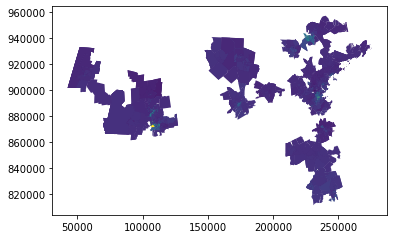

In [113]:
FinalData.plot(column = '% Change in Republican Votes')